# ~MegaMachine~

**Copyright@~MEGAMACHINE~**; 

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License. You may obtain a copy of the License at https://www.apache.org/licenses/LICENSE-2.0. Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

In [1]:
!python --version   # Python version

# About python:  https://www.python.org/
#                Python is powerful... and fast; plays well with others; runs everywhere; is friendly & easy to learn; 
#                is Open –> https://www.python.org/about/.
#     Python docs: https://docs.python.org/3/ (all documentation); 
#                  https://docs.python.org/3.7/ (Recommended version – 3.7). 
# The Python Tutorial (python3.7): https://docs.python.org/3.7/tutorial/index.html 

Python 3.8.15


# [The CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html)

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Source: https://www.cs.toronto.edu/~kriz/cifar.html

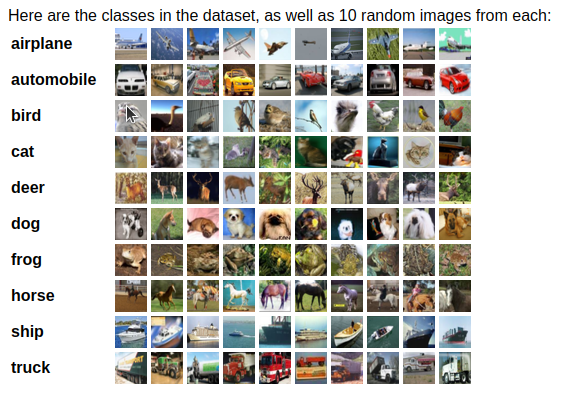

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

tensorflow link (dataset): https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data


### load modules 

In [2]:
# load numerical python 
import numpy as np 
# load pandas  
import pandas as pd 
# load seaborn 
import seaborn as sns
# load matplotlib's pyplot 
from matplotlib import pyplot as plt
# load tensorflow 
import tensorflow as tf 
# load tensorflow dataset 
#import tensorflow_datasets as tfds

# see tensorflow version 
tf.__version__

'2.9.2'

### load dataset 

In [3]:
# load dataset source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data
(Xtrain,ytrain),(Xtest,ytest)=tf.keras.datasets.cifar10.load_data()
# see shapes of outputs 
Xtrain.shape,ytrain.shape,Xtest.shape,ytest.shape# color images 

170498071/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
# convert y (labels) to 1-D 
ytrain,ytest=ytrain.reshape(-1),ytest.reshape(-1)

# see Xtrain shape (inputs)
print('Training data shape:',Xtrain.shape,'; of type:',Xtrain.dtype)# (samples,height,width)
# see ytrain shape (outputs / labels)
print('Training data labels:',ytrain.shape,'; of type:',ytrain.dtype)# (equal to number of samples)
# see Xtest shape (inputs)
print('Testing data shape:',Xtest.shape,'; of type:',Xtest.dtype)# (samples,height,width)
# see ytest shape (outputs / labels)
print('Testing data labels:',ytest.shape,'; of type:',ytest.dtype)# (equal to number of samples)

# see X range (pixel value range) (8-bits (256 different values) images, i.e. must be 0 to 255)
print(f'Xtrain maximum value: {np.max(Xtrain)} and minimum value: {np.min(Xtrain)}')
print(f'Xtest maximum value: {np.max(Xtest)} and minimum value: {np.min(Xtest)}')

# see all unique values in labels 
print(f'ytrain unique labels: {set(ytrain)}')
print(f'ytest unique labels: {set(ytest)}')

Training data shape: (50000, 32, 32, 3) ; of type: uint8
Training data labels: (50000,) ; of type: uint8
Testing data shape: (10000, 32, 32, 3) ; of type: uint8
Testing data labels: (10000,) ; of type: uint8
Xtrain maximum value: 255 and minimum value: 0
Xtest maximum value: 255 and minimum value: 0
ytrain unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
ytest unique labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


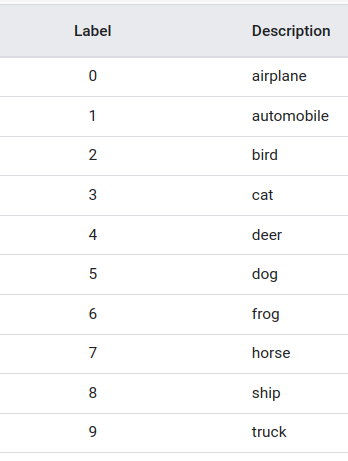

Source: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

In [5]:
# make list for labels 
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### plot data 

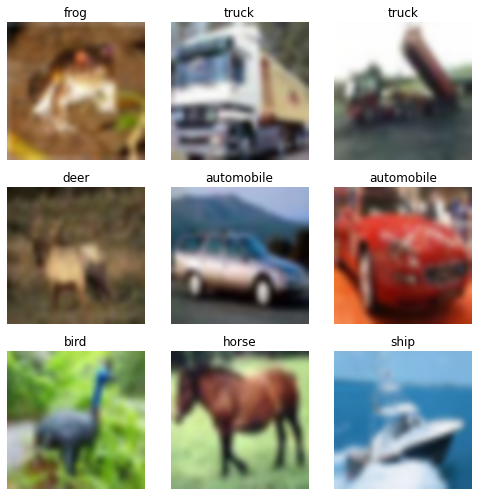

In [6]:
# make figure (set figure size)
plt.figure(figsize=(7,7))
# make plot data (9-images)
for index in range(9):
  # make subplots 
  plt.subplot(3,3,index+1)
  # make plot image 
  plt.imshow(Xtrain[index],cmap='gray',interpolation='bicubic')
  # make axis off 
  plt.axis('off')
  # add title 
  plt.title(labels[ytrain[index]])
# make plot nearer and nearer 
plt.tight_layout()
# make show 
plt.show()

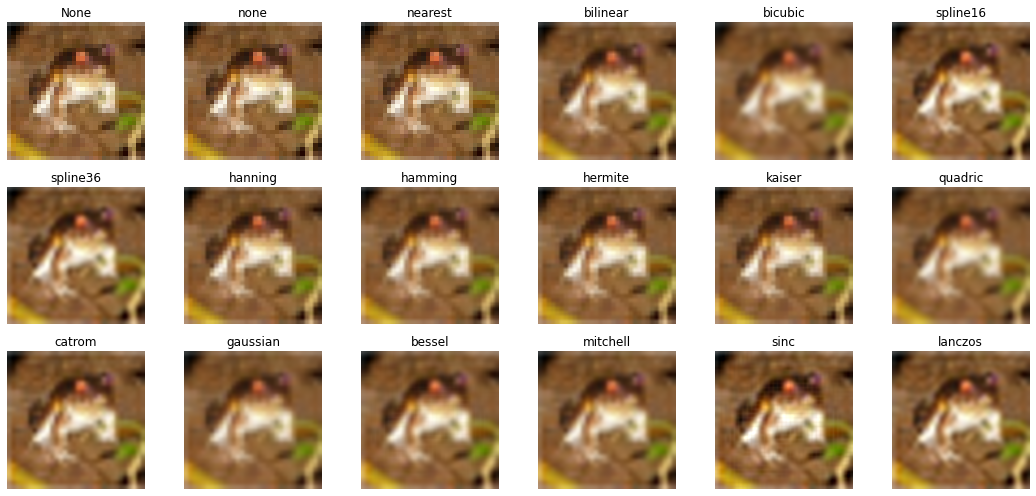

In [7]:
# Source: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
interpolations=[None,'none','nearest','bilinear','bicubic','spline16','spline36','hanning',
                'hamming','hermite','kaiser','quadric','catrom','gaussian','bessel','mitchell',
                'sinc','lanczos']

# make figure (set figure size)
plt.figure(figsize=(15,7))
# plot and test all interpolations
for index,interpolation in enumerate(interpolations):
  # make subplots 
  plt.subplot(3,6,index+1)
  # make plot image
  plt.imshow(Xtrain[0],cmap='gray',interpolation=interpolation)
  # make axis off 
  plt.axis('off')
  # add title 
  plt.title(str(interpolation))
# make plot nearer and nearer 
plt.tight_layout()
# make show 
plt.show()

In [55]:
# split channels of image (into RGB)

# plot image 
plt.figure(figsize=(40,50))
# make plot image channel wise 
for channel,color in enumerate(['gray','Reds','gray','Greens','gray','Blues']):
  # make subplot for channel 
  plt.subplot(3,2,channel+1)
  # make plot image 
  #plt.imshow(Xtrain[0,:,:,channel//2],cmap=color)
  # plot as heat map fmt='.2g' return as scientific notation
  sns.heatmap(Xtrain[0,:,:,channel//2],cmap=color,annot=True,linewidths=0.5,linecolor="white",cbar=False,fmt='g')
  # make axis off 
  plt.axis('off')
# make plot nearer and nearer 
plt.tight_layout()
# make figure save 
plt.savefig('pixel-values.png',dpi=None)
# make show 
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### pre-process dataset (scale pixels)

In [8]:
# make images scale to 0 and 1 
Xtrain_processed=(Xtrain / Xtrain.max()).astype(np.float32)
Xtest_processed=(Xtest / Xtest.max()).astype(np.float32)

# see X range (pixel value range) (8-bits (256 different values) images, i.e. must be 0 to 255)
print(f'Xtrain maximum value: {np.max(Xtrain_processed)} and minimum value: {np.min(Xtrain_processed)}',
      'data-type:',Xtrain_processed.dtype)
print(f'Xtest maximum value: {np.max(Xtest_processed)} and minimum value: {np.min(Xtest_processed)}',
      'data-type:',Xtest_processed.dtype)

Xtrain maximum value: 1.0 and minimum value: 0.0 data-type: float32
Xtest maximum value: 1.0 and minimum value: 0.0 data-type: float32


### make and train simple cnn model 

Source: https://www.tensorflow.org/tutorials/images/cnn

**Create the convolutional base:** The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure your CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to your first layer.

In [14]:
# make model - Sequential (define model)
model=tf.keras.Sequential(layers=None,name='cifar_clf')
# add convolution layer : input - 32, 32, 3 -> 30, 30, 32
model.add(tf.keras.layers.Convolution2D(32,(3,3),strides=(1,1),padding='valid',activation='relu',input_shape=Xtrain.shape[1:]))
# add max-pooling layer : 30, 30, 32 -> 15, 15, 32 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
# add convolution layer : input - 15, 15, 3 -> 13, 13, 64
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))
# add max-pooling layer : 13, 13, 64 -> 6, 6, 64 
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=None,padding='valid',data_format=None))
# add convolution layer : input - 6, 6, 64 -> 4, 4, 64
model.add(tf.keras.layers.Convolution2D(64,(3,3),strides=(1,1),padding='valid',activation='relu'))

In [15]:
# make model build 
#model.build(input_shape=(None,*Xtrain.shape[1:]))# as input shape is given in first layer 
# see model summary 
model.summary()

Model: "cifar_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trainab

above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

Add Dense layers on top
To complete the model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [17]:
# add Flatten layer : 4, 4, 64 -> 1024
model.add(tf.keras.layers.Flatten())
# add dense layer 1 : 1024 -> 64 
model.add(tf.keras.layers.Dense(64,activation='relu'))
# add dense layer - output : 64 -> 10
model.add(tf.keras.layers.Dense(10,activation='softmax'))# for 10 classes 

# see model summary 
model.summary()

Model: "cifar_clf"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0 

**Compile the model:**

In [19]:
# make model compile 
#model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
model.compile(optimizer='rmsprop',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

**Feed the model:**

In [20]:
# make model train 
history=model.fit(x=Xtrain_processed,y=ytrain,batch_size=None,epochs=10,verbose='auto',callbacks=None,validation_split=0.3,
                  validation_data=None,shuffle=True)

Epoch 1/10
1094/1094 [==============================] - 15s 6ms/step - loss: 1.6051 - accuracy: 0.4164 - val_loss: 1.3312 - val_accuracy: 0.5172
Epoch 2/10
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2295 - accuracy: 0.5615 - val_loss: 1.1713 - val_accuracy: 0.5859
Epoch 3/10
1094/1094 [==============================] - 6s 6ms/step - loss: 1.0588 - accuracy: 0.6298 - val_loss: 1.0798 - val_accuracy: 0.6358
Epoch 4/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9438 - accuracy: 0.6698 - val_loss: 0.9422 - val_accuracy: 0.6744
Epoch 5/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8480 - accuracy: 0.7046 - val_loss: 1.0185 - val_accuracy: 0.6493
Epoch 6/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7711 - accuracy: 0.7322 - val_loss: 0.9297 - val_accuracy: 0.6821
Epoch 7/10
1094/1094 [==============================] - 6s 5ms/step - loss: 0.7082 - accuracy: 0.7532 - val_loss: 0.9157 - val_accuracy

### see model history 

In [21]:
# convert model history to pandas array (see first five epochs)
pd.DataFrame(history.history).head()

,loss,accuracy,val_loss,val_accuracy
0,1.605130,0.416429,1.331219,0.517200
1,1.229548,0.561486,1.171293,0.585933
2,1.058808,0.629800,1.079833,0.635800
3,0.943802,0.669800,0.942156,0.674400
4,0.847957,0.704571,1.018468,0.649333


In [22]:
# convert model history to pandas array (see last five epochs)
pd.DataFrame(history.history).tail()

,loss,accuracy,val_loss,val_accuracy
5,0.771086,0.732229,0.929685,0.682067
6,0.708181,0.753200,0.915669,0.693600
7,0.646972,0.776286,0.953354,0.699800
8,0.594688,0.792657,0.969178,0.690867
9,0.546143,0.808457,1.047267,0.678267


### plot model history 

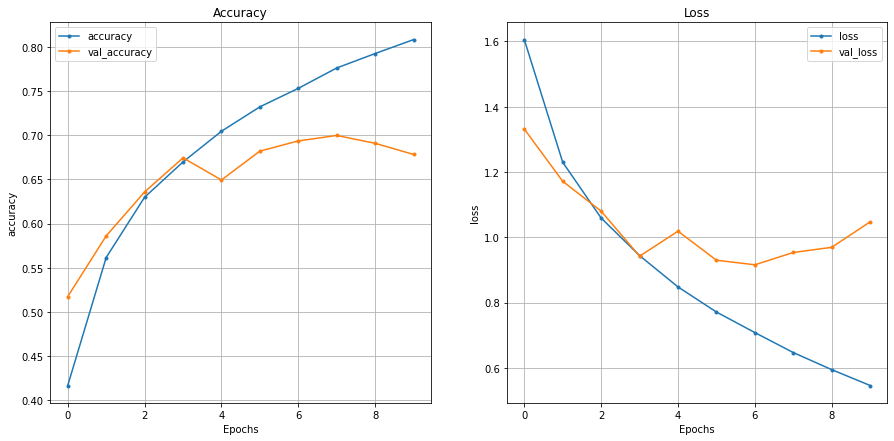

In [23]:
# make figure 
plt.figure(figsize=(15,7))

# make subplot 
plt.subplot(1,2,1)
# make plot accuracy (training accuracy)
pd.DataFrame(history.history)['accuracy'].plot(marker='.')
# make plot accuracy (validation accuracy)
pd.DataFrame(history.history)['val_accuracy'].plot(marker='.')
# add axis and title 
plt.title('Accuracy'),plt.xlabel('Epochs'),plt.ylabel('accuracy')
# add grid and legend 
plt.grid(),plt.legend()

# make figure (plot loss)
#plt.figure(figsize=(7,7))
# make subplot 
plt.subplot(1,2,2)
# make plot accuracy (training loss)
pd.DataFrame(history.history)['loss'].plot(marker='.')
# make plot accuracy (validation loss)
pd.DataFrame(history.history)['val_loss'].plot(marker='.')
# add axis and title 
plt.title('Loss'),plt.xlabel('Epochs'),plt.ylabel('loss')
# add grid and legend 
plt.grid(),plt.legend()
# make plot show
#plt.show()

# make plot show
plt.show()

### evaluate model 

Evaluate accuracy: Next, compare how the model performs on the test dataset. 

In [24]:
# make model evaluate 
loss,accuracy=model.evaluate(x=Xtest_processed,y=ytest,batch_size=None,verbose='auto')
# see results 
print(f'Model testing accuracy: {accuracy}; and loss: {loss}')

313/313 [==============================] - 1s 3ms/step - loss: 1.0630 - accuracy: 0.6757
Model testing accuracy: 0.6757000088691711; and loss: 1.062992811203003


### make predictions 

With the model trained, you can use it to make predictions about some images. Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.




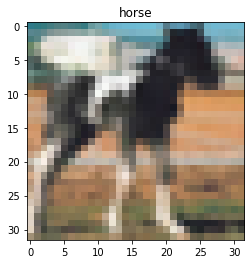

In [26]:
# make prediction on random image 
random_index=np.random.choice(range(Xtest.shape[0]))
# make plot image of random index 
plt.imshow(Xtest[random_index])# make image plot
plt.title(labels[ytest[random_index]])# add title to plot
plt.show()# make image show 

In [27]:
# make prediction using model (input image)
probabilities=model.predict(Xtest[[random_index]])
# or #probabilities=model(Xtest[[random_index]])
# see probabilities 
print('Model prediction prbabilities:',probabilities)
print('I think this is a image of',labels[np.argmax(probabilities)])

1/1 [==============================] - 0s 143ms/step
Model prediction prbabilities: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
I think this is a image of dog


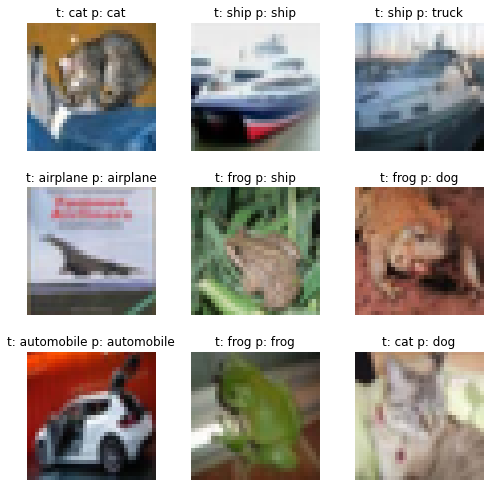

In [28]:
# make figure (set figure size)
plt.figure(figsize=(7,7))
# make plot data (9-images)
for index in range(9):
  # make subplots 
  plt.subplot(3,3,index+1)
  # make plot image 
  plt.imshow(Xtest[index],cmap='gray')
  # make axis off 
  plt.axis('off')
  # make image predicted 
  #prediction=np.argmax(model.predict(Xtest[[index]],verbose=0))
  prediction=np.argmax(model(Xtest[[index]]))
  # add title 
  plt.title('t: '+str(labels[ytest[index]])+' p: '+str(labels[prediction]))
# make plot nearer and nearer 
plt.tight_layout()
# make show 
plt.show()

### confusion matrix

In [29]:
# load module - confusion atrix
from sklearn.metrics import confusion_matrix

# make prediction on all testing data 
ypredictions=np.argmax(model(Xtest),axis=1)

# make see confusion matrix
confusion_matrix(ytest,ypredictions,labels=range(10))

array([[843,  34,  19,   1,   1,   2,   2,   6,  32,  60],
       [ 40, 801,   0,   1,   1,   2,   1,   0,  16, 138],
       [239,  48, 367,  26,   8,  99,  17,  59,  27, 110],
       [183,  63,  58, 118,   5, 250,  12,  93,  56, 162],
       [257,  52,  99,  23,  77, 155,  23, 167,  30, 117],
       [100,  19,  55,  35,   1, 540,   5,  97,  33, 115],
       [163, 115,  74,  28,   3,  79, 275,  48,  50, 165],
       [ 79,  33,  24,   6,   1,  61,   0, 638,   7, 151],
       [224,  43,   2,   1,   0,   1,   0,   2, 631,  96],
       [ 63, 108,   4,   0,   0,   0,   0,   5,  10, 810]])

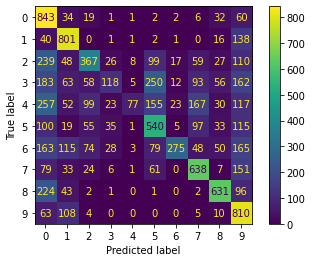

In [31]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

# make figure 
#plt.figure(figsize=(7,7))
# make plot Confusion Matrix Display
display=ConfusionMatrixDisplay(confusion_matrix(ytest,ypredictions,labels=range(10)))
# make plot 
display.plot()
# make show 
plt.show()

### make prediction using global image 

In [ ]:
# Online paint - https://jspaint.app/#local:64b424e733387
# make image of near 28 x 28 pixels 

# make load module for reading image 
#from matplotlib import image as imread
import cv2 as vision 

# load image 
image=vision.imread('untitled.png',vision.IMREAD_GRAYSCALE)
# resize image 
image=vision.resize(image,(28,28))
# resscale image 
image_scaled=(image/image.max()).astype(np.float32)
# make prediction 
probabilities=model(np.expand_dims(image_scaled,axis=0))
# see probabilities 
print('probabilities:',probabilities)
# make plot image --------------------------------------------------------------
plt.imshow(image_scaled,cmap='gray')
plt.title('I think image is of '+str(np.argmax(probabilities)))
plt.show()

# References

* https://www.cs.toronto.edu/~kriz/cifar.html
* Source: https://www.tensorflow.org/tutorials/images/cnn
* Training a neural network on MNIST with Keras - https://www.tensorflow.org/datasets/keras_example 
* Dataset - [tf.keras.datasets.cifar10.load_data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)
* Dataset (from tensorflow-dataset - https://www.tensorflow.org/datasets/catalog/cifar10)
* Image classification - https://www.tensorflow.org/tutorials/images/classification

If the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:

* [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
* [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

